In [3]:
import pandas as pd

def getMovieMeta(filepath):

    # Read the file
    MovieMeta = pd.read_csv(filepath, sep='\t')

    # Rename each column
    MovieMeta.columns=['Wikipedia movie ID',
                       'Freebase movie ID',
                       'Movie name',
                       'Movie release date',
                       'Movie box office revenue',
                       'Movie runtime',
                       'Movie languages',
                       'Movie countries',
                       'Movie genres']
    return MovieMeta


def getCharacterMeta(filepath):

    # Read the file
    CharacterMeta=pd.read_csv(filepath, sep='\t')

    # Rename each column
    CharacterMeta.columns=['Wikipedia movie ID',
                           'Freebase movie ID',
                           'Movie release date',
                           'Character name',
                           'Actor date of birth',
                           'Actor gender',
                           'Actor height',
                           'Actor ethnicity',
                           'Actor name',
                           'Actor age at movie release',
                           'Freebase character/actor map ID',
                           'Freebase character ID',
                           'Freebase actor ID']
    return CharacterMeta


CharacterMeta=getCharacterMeta('../data/RawDatasets/MovieSummaries/character.metadata.tsv')
# MovieMeta=getMovieMeta('MovieSummaries/movie.metadata.tsv')



In [6]:
print(len(CharacterMeta['Actor date of birth']))
print(len(CharacterMeta))

330572
330572


In [3]:
print(CharacterMeta['Movie release date'].isna().sum())
print(CharacterMeta.shape)

9995
(450668, 13)


In [4]:
print(CharacterMeta['Actor height'].isna().sum())

295845


In [5]:
print(CharacterMeta['Actor date of birth'].isna().sum())


106145


In [6]:
print(CharacterMeta['Actor gender'].isna().sum())

45609


In [7]:
print(CharacterMeta['Actor ethnicity'].isna().sum())

344610


In [8]:
print(CharacterMeta['Actor name'].isna().sum())

1228


In [9]:
print(CharacterMeta['Actor age at movie release'].isna().sum())

158113


In [10]:
print(CharacterMeta['Freebase character ID'].isna().sum())

257865


In [11]:
print(MovieMeta['Movie name'].isna().sum())

0


In [12]:
print(MovieMeta['Movie release date'].isna().sum())

6902


In [13]:
print(MovieMeta['Movie box office revenue'].isna().sum())
print(MovieMeta['Movie runtime'].isna().sum())
print(MovieMeta['Movie languages'].isna().sum())
print(MovieMeta['Movie countries'].isna().sum())
print(MovieMeta['Movie genres'].isna().sum())
print(MovieMeta.shape)

73340
20450
0
0
0
(81740, 9)


In [14]:
# 1. 查看genres的基本情况 
print("=== Movie Genres Sample ===")
print(MovieMeta['Movie genres'].head())
print("\n=== Unique Genres Count ===")
# 由于genres可能是用某种分隔符分开的,先打印看下格式
print(MovieMeta['Movie genres'].iloc[0])

# 2. 查看演员生日的格式
print("\n=== Actor Birth Date Sample ===")
print(CharacterMeta['Actor date of birth'].head())

# 3. 打印一些基本统计信息
print("\n=== Basic Statistics ===")
print("Total number of movies:", len(MovieMeta))
print("Total number of characters/actors:", len(CharacterMeta))

=== Movie Genres Sample ===
0    {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...
1    {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...
2    {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...
3                              {"/m/07s9rl0": "Drama"}
4    {"/m/02hmvc": "Short Film", "/m/06ppq": "Silen...
Name: Movie genres, dtype: object

=== Unique Genres Count ===
{"/m/02n4kr": "Mystery", "/m/03bxz7": "Biographical film", "/m/07s9rl0": "Drama", "/m/0hj3n01": "Crime Drama"}

=== Actor Birth Date Sample ===
0    1974-08-15
1    1969-06-15
2    1967-09-12
3    1977-09-25
4    1949-05-26
Name: Actor date of birth, dtype: object

=== Basic Statistics ===
Total number of movies: 81740
Total number of characters/actors: 450668


In [15]:
# 1. 提取所有独特的电影类型
all_genres = set()
for genres_dict_str in MovieMeta['Movie genres'].dropna():
    # 将字符串转换为字典
    genres_dict = eval(genres_dict_str)
    # 只获取类型名称(字典的值)
    genres = genres_dict.values()
    all_genres.update(genres)

print("=== Total Unique Genres ===")
print(f"Number of unique genres: {len(all_genres)}")
print("\nSample of genres:")
print(list(all_genres)[:10])

# 2. 检查演员出生日期的有效性
print("\n=== Birth Date Statistics ===")
print("Number of valid birth dates:", 
      CharacterMeta['Actor date of birth'].notna().sum())
print("\nSample of birth dates distribution:")
print(CharacterMeta['Actor date of birth'].value_counts().head())

=== Total Unique Genres ===
Number of unique genres: 363

Sample of genres:
['Gulf War', 'Parody', 'Environmental Science', 'Fantasy Comedy', 'Road-Horror', 'Costume drama', 'Dance', 'Libraries and librarians', 'Supernatural', 'Business']

=== Birth Date Statistics ===
Number of valid birth dates: 344523

Sample of birth dates distribution:
Actor date of birth
1908-05-30    791
1964          349
1950-06-16    333
1970          301
1892-01-18    299
Name: count, dtype: int64


In [16]:
# 1. 分析演员年龄分布
def extract_year(date_str):
    if pd.isna(date_str):
        return None
    try:
        # 处理完整日期格式
        if '-' in str(date_str):
            return pd.to_datetime(date_str).year
        # 处理仅年份格式
        return int(date_str)
    except:
        return None

birth_years = CharacterMeta['Actor date of birth'].apply(extract_year)
print("=== Birth Year Distribution ===")
print("\nEarliest birth year:", birth_years.min())
print("Latest birth year:", birth_years.max())
print("\nMost common birth years:")
print(birth_years.value_counts().head())

# 2. 分析电影类型的频率
genre_counts = {}
for genres_dict_str in MovieMeta['Movie genres'].dropna():
    genres_dict = eval(genres_dict_str)
    for genre in genres_dict.values():
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

print("\n=== Most Common Movie Genres ===")
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
for genre, count in sorted_genres[:10]:
    print(f"{genre}: {count}")

=== Birth Year Distribution ===

Earliest birth year: 183.0
Latest birth year: 2050.0

Most common birth years:
Actor date of birth
1965.0    5826
1950.0    5619
1970.0    5490
1964.0    5320
1962.0    5107
Name: count, dtype: int64

=== Most Common Movie Genres ===
Drama: 34007
Comedy: 16349
Romance Film: 10234
Black-and-white: 9094
Action: 8797
Thriller: 8743
Short Film: 8141
World cinema: 7155
Crime Fiction: 6948
Indie: 6897


In [17]:
# 数据清洗和分析
def clean_birth_year(date_str):
    if pd.isna(date_str):
        return None
    try:
        # 处理完整日期格式
        if '-' in str(date_str):
            year = pd.to_datetime(date_str).year
        else:
            # 处理仅年份格式
            year = int(date_str)
        
        # 设置合理的年份范围 (1850-2024)
        if 1850 <= year <= 2024:
            return year
        return None
    except:
        return None

# 清洗生日数据
total_records = len(CharacterMeta)
birth_years = CharacterMeta['Actor date of birth'].apply(clean_birth_year)
valid_records = birth_years.notna().sum()

print("=== Data Cleaning Statistics ===")
print(f"Total records: {total_records}")
print(f"Valid records after cleaning: {valid_records}")
print(f"Removed records: {total_records - valid_records}")
print(f"Percentage of valid data: {(valid_records/total_records*100):.2f}%")

print("\n=== Clean Birth Year Distribution ===")
print("\nMost common birth years:")
print(birth_years.value_counts().head())

# 计算演员年龄分布（以2024年为基准）
ages_2024 = 2024 - birth_years
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', 
              '61-70', '71-80', '81-90', '91-100', '100+']
age_groups = pd.cut(ages_2024, bins=age_bins, labels=age_labels)

print("\n=== Age Distribution (as of 2024) ===")
print(age_groups.value_counts().sort_index())

# 电影类型清洗和分析
valid_genres = {'Drama', 'Comedy', 'Romance Film', 'Action', 'Thriller', 
                'Documentary', 'Horror', 'Adventure', 'Animation', 'Science Fiction'}

genre_counts_clean = {}
total_movies = 0
valid_movies = 0

for genres_dict_str in MovieMeta['Movie genres'].dropna():
    total_movies += 1
    genres_dict = eval(genres_dict_str)
    valid_movie = False
    for genre in genres_dict.values():
        if genre in valid_genres:
            genre_counts_clean[genre] = genre_counts_clean.get(genre, 0) + 1
            valid_movie = True
    if valid_movie:
        valid_movies += 1

print("\n=== Movie Genre Cleaning Statistics ===")
print(f"Total movies with genre info: {total_movies}")
print(f"Movies with valid genres: {valid_movies}")
print(f"Percentage of movies with valid genres: {(valid_movies/total_movies*100):.2f}%")

print("\n=== Top Clean Movie Genres ===")
sorted_genres_clean = sorted(genre_counts_clean.items(), key=lambda x: x[1], reverse=True)
for genre, count in sorted_genres_clean:
    print(f"{genre}: {count}")

=== Data Cleaning Statistics ===
Total records: 450668
Valid records after cleaning: 344440
Removed records: 106228
Percentage of valid data: 76.43%

=== Clean Birth Year Distribution ===

Most common birth years:
Actor date of birth
1965.0    5826
1950.0    5619
1970.0    5490
1964.0    5320
1962.0    5107
Name: count, dtype: int64

=== Age Distribution (as of 2024) ===
Actor date of birth
0-20         49
21-30      1930
31-40     13348
41-50     36095
51-60     48916
61-70     46868
71-80     43899
81-90     33828
91-100    30785
100+      88722
Name: count, dtype: int64

=== Movie Genre Cleaning Statistics ===
Total movies with genre info: 81740
Movies with valid genres: 66455
Percentage of movies with valid genres: 81.30%

=== Top Clean Movie Genres ===
Drama: 34007
Comedy: 16349
Romance Film: 10234
Action: 8797
Thriller: 8743
Documentary: 5630
Horror: 5279
Adventure: 4962
Animation: 3534
Science Fiction: 3051


In [18]:
# 分析演员出生年份的时代分布
def get_era(year):
    if year < 1900:
        return "Pre-1900s"
    elif year < 1920:
        return "Silent Era (1900-1920)"
    elif year < 1940:
        return "Golden Age Begin (1920-1940)"
    elif year < 1960:
        return "Golden Age Peak (1940-1960)"
    elif year < 1980:
        return "New Hollywood (1960-1980)"
    elif year < 2000:
        return "Modern Era (1980-2000)"
    else:
        return "Contemporary (2000+)"

era_distribution = birth_years.apply(get_era).value_counts()

print("=== Actor Birth Year by Cinema Eras ===")
print(era_distribution)
print("\nPercentage Distribution:")
era_percentages = (era_distribution / len(birth_years.dropna()) * 100).round(2)
for era, percentage in era_percentages.items():
    print(f"{era}: {percentage}%")

# 分析不同时代主流的电影类型
print("\n=== Top Movie Genres Distribution ===")
print("(As percentage of all valid movies)")
total_valid_movies = valid_movies
for genre, count in sorted_genres_clean:
    percentage = round((count / total_valid_movies * 100), 2)  # 修正这里的round用法
    print(f"{genre}: {percentage}%")

# 计算每部电影平均包含的类型数
genre_counts_per_movie = []
for genres_dict_str in MovieMeta['Movie genres'].dropna():
    genres_dict = eval(genres_dict_str)
    genre_counts_per_movie.append(len(genres_dict))

avg_genres = round(sum(genre_counts_per_movie) / len(genre_counts_per_movie), 2)
print(f"\nAverage number of genres per movie: {avg_genres}")

=== Actor Birth Year by Cinema Eras ===
Actor date of birth
Contemporary (2000+)            106448
New Hollywood (1960-1980)        92219
Golden Age Peak (1940-1960)      85116
Golden Age Begin (1920-1940)     62586
Silent Era (1900-1920)           44409
Pre-1900s                        32101
Modern Era (1980-2000)           27789
Name: count, dtype: int64

Percentage Distribution:
Contemporary (2000+): 30.9%
New Hollywood (1960-1980): 26.77%
Golden Age Peak (1940-1960): 24.71%
Golden Age Begin (1920-1940): 18.17%
Silent Era (1900-1920): 12.89%
Pre-1900s: 9.32%
Modern Era (1980-2000): 8.07%

=== Top Movie Genres Distribution ===
(As percentage of all valid movies)
Drama: 51.17%
Comedy: 24.6%
Romance Film: 15.4%
Action: 13.24%
Thriller: 13.16%
Documentary: 8.47%
Horror: 7.94%
Adventure: 7.47%
Animation: 5.32%
Science Fiction: 4.59%

Average number of genres per movie: 2.98



=== Actors Count by Zodiac Sign ===
Aries: 30289
Taurus: 26322
Gemini: 27531
Cancer: 25702
Leo: 29189
Virgo: 30647
Libra: 30300
Scorpio: 26903
Sagittarius: 23834
Capricorn: 24211
Aquarius: 26442
Pisces: 29267


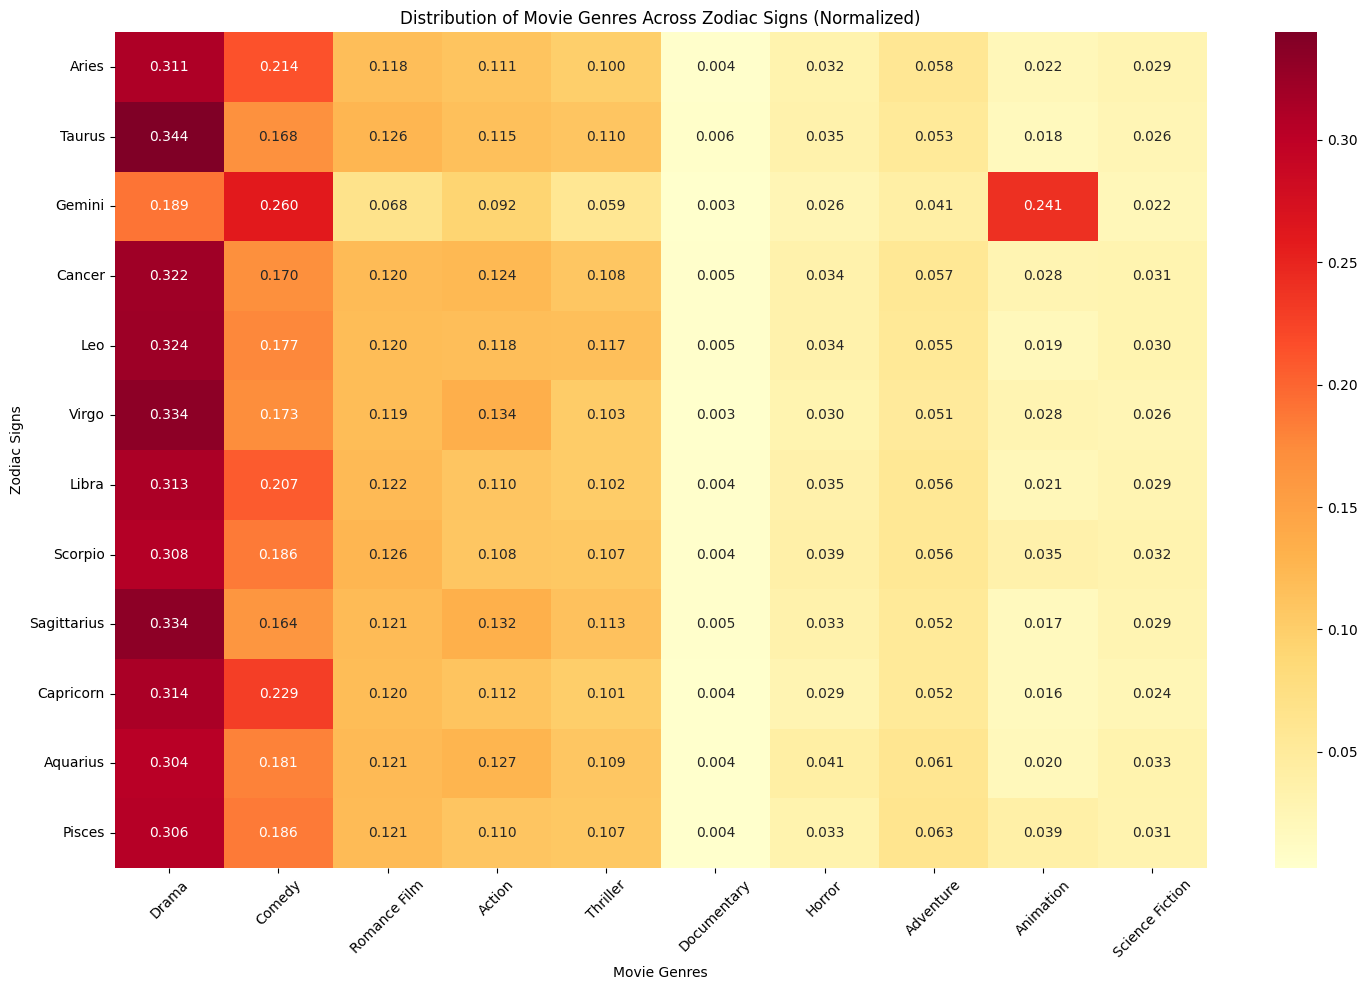


=== Genre Preference by Zodiac Sign ===

Aries:
Total movies: 1303100
Top 3 genres:
Drama: 31.12%
Comedy: 21.43%
Romance Film: 11.79%

Taurus:
Total movies: 1039393
Top 3 genres:
Drama: 34.40%
Comedy: 16.81%
Romance Film: 12.65%

Gemini:
Total movies: 2095784
Top 3 genres:
Comedy: 25.97%
Animation: 24.09%
Drama: 18.94%

Cancer:
Total movies: 1007956
Top 3 genres:
Drama: 32.25%
Comedy: 17.02%
Action: 12.38%

Leo:
Total movies: 1075160
Top 3 genres:
Drama: 32.38%
Comedy: 17.69%
Romance Film: 11.95%

Virgo:
Total movies: 1312284
Top 3 genres:
Drama: 33.37%
Comedy: 17.32%
Action: 13.36%

Libra:
Total movies: 1331409
Top 3 genres:
Drama: 31.27%
Comedy: 20.74%
Romance Film: 12.15%

Scorpio:
Total movies: 1027637
Top 3 genres:
Drama: 30.75%
Comedy: 18.58%
Romance Film: 12.56%

Sagittarius:
Total movies: 992795
Top 3 genres:
Drama: 33.38%
Comedy: 16.38%
Action: 13.22%

Capricorn:
Total movies: 1013226
Top 3 genres:
Drama: 31.40%
Comedy: 22.92%
Romance Film: 11.98%

Aquarius:
Total movies: 103

In [24]:
import ephem
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

def get_zodiac_sign_accurate(date_str):
    if pd.isna(date_str):
        return None
    
    try:
        if '-' in str(date_str):
            date = pd.to_datetime(date_str)
        else:
            return None
            
        # 创建ephem Date对象
        ephem_date = ephem.Date(date)
        
        # 获取太阳在黄道带上的位置
        sun = ephem.Sun()
        sun.compute(ephem_date)
        
        # 将角度转换为度数
        deg = float(sun.ra) * 180 / ephem.pi
        
        # 根据度数判断星座
        zodiac_ranges = [
            (0, 30, 'Aries'),
            (30, 60, 'Taurus'),
            (60, 90, 'Gemini'),
            (90, 120, 'Cancer'),
            (120, 150, 'Leo'),
            (150, 180, 'Virgo'),
            (180, 210, 'Libra'),
            (210, 240, 'Scorpio'),
            (240, 270, 'Sagittarius'),
            (270, 300, 'Capricorn'),
            (300, 330, 'Aquarius'),
            (330, 360, 'Pisces')
        ]
        
        for start, end, sign in zodiac_ranges:
            if start <= deg < end:
                return sign
        return 'Pisces'  # 处理360度的情况
        
    except:
        return None

# 使用新的函数更新星座信息
CharacterMeta['zodiac'] = CharacterMeta['Actor date of birth'].apply(get_zodiac_sign_accurate)

# 创建演员-电影类型映射
actor_genres = {}
for _, row in MovieMeta.iterrows():
    movie_id = row['Wikipedia movie ID']  # 修改为正确的列名
    genres = eval(row['Movie genres'])
    # 获取这部电影的所有演员
    movie_actors = CharacterMeta[CharacterMeta['Wikipedia movie ID'] == movie_id]['Freebase actor ID']
    for actor_id in movie_actors:
        if actor_id not in actor_genres:
            actor_genres[actor_id] = {}
        for genre in genres.values():
            if genre in actor_genres[actor_id]:
                actor_genres[actor_id][genre] += 1
            else:
                actor_genres[actor_id][genre] = 1

# 创建星座-类型矩阵
valid_genres = ['Drama', 'Comedy', 'Romance Film', 'Action', 'Thriller', 
                'Documentary', 'Horror', 'Adventure', 'Animation', 'Science Fiction']
zodiac_signs = ['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 
                'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces']

genre_zodiac_matrix = np.zeros((len(zodiac_signs), len(valid_genres)))

# 首先统计每个星座的演员人数
zodiac_counts = CharacterMeta['zodiac'].value_counts()
print("\n=== Actors Count by Zodiac Sign ===")
for zodiac in zodiac_signs:
    count = zodiac_counts.get(zodiac, 0)
    print(f"{zodiac}: {count}")

for i, zodiac in enumerate(zodiac_signs):
    zodiac_actors = CharacterMeta[CharacterMeta['zodiac'] == zodiac]['Freebase actor ID']
    for actor_id in zodiac_actors:
        if actor_id in actor_genres:
            for j, genre in enumerate(valid_genres):
                genre_zodiac_matrix[i][j] += actor_genres[actor_id].get(genre, 0)

# 计算每个星座的总电影数，用于标准化
zodiac_totals = genre_zodiac_matrix.sum(axis=1)
genre_zodiac_matrix_normalized = genre_zodiac_matrix / zodiac_totals[:, np.newaxis]

# 绘制热力图
plt.figure(figsize=(15, 10))
sns.heatmap(genre_zodiac_matrix_normalized, 
            xticklabels=valid_genres,
            yticklabels=zodiac_signs,
            cmap='YlOrRd',
            annot=True,
            fmt='.3f')

plt.title('Distribution of Movie Genres Across Zodiac Signs (Normalized)')
plt.xlabel('Movie Genres')
plt.ylabel('Zodiac Signs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 打印详细统计信息
print("\n=== Genre Preference by Zodiac Sign ===")
for i, zodiac in enumerate(zodiac_signs):
    print(f"\n{zodiac}:")
    total_movies = zodiac_totals[i]
    print(f"Total movies: {int(total_movies)}")
    print("Top 3 genres:")
    genre_percentages = [(genre, genre_zodiac_matrix_normalized[i][j] * 100) 
                        for j, genre in enumerate(valid_genres)]
    sorted_genres = sorted(genre_percentages, key=lambda x: x[1], reverse=True)
    for genre, percentage in sorted_genres[:3]:
        print(f"{genre}: {percentage:.2f}%")

# 计算显著性
print("\n=== Statistical Significance ===")
from scipy import stats
# 对每个类型进行卡方检验
for j, genre in enumerate(valid_genres):
    genre_dist = genre_zodiac_matrix[:, j]
    chi2, p_value = stats.chisquare(genre_dist)
    print(f"{genre}: chi2={chi2:.2f}, p-value={p_value:.4f}")


=== Actors Count by Zodiac Sign ===
Aries: 30289
Taurus: 26322
Gemini: 27531
Cancer: 25702
Leo: 29189
Virgo: 30647
Libra: 30300
Scorpio: 26903
Sagittarius: 23834
Capricorn: 24211
Aquarius: 26442
Pisces: 29267


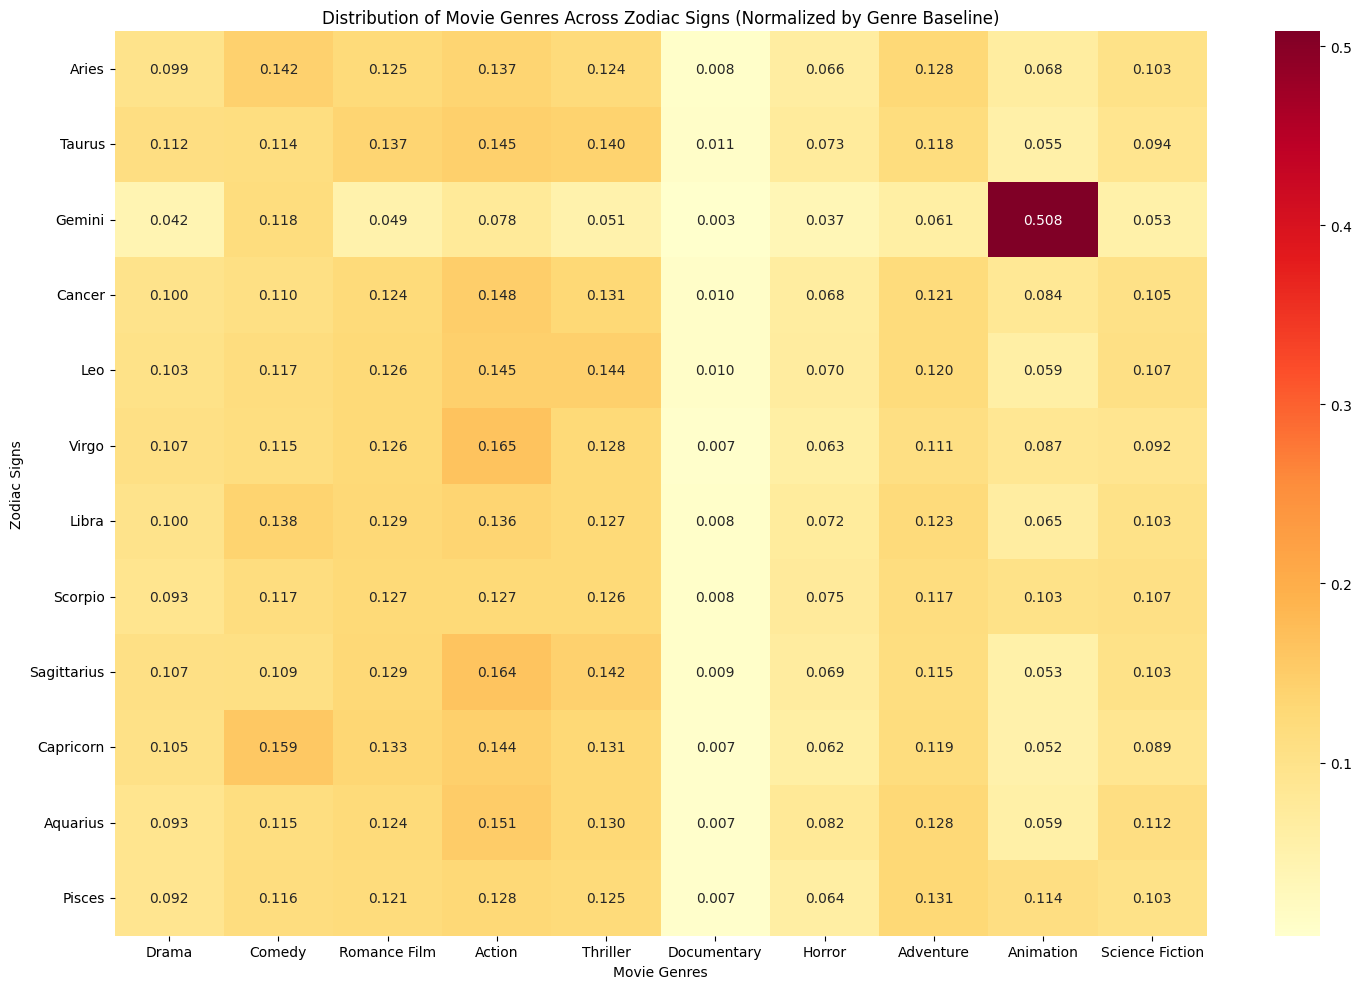


=== Statistical Significance ===
Drama: chi2=0.04, p-value=1.0000
Comedy: chi2=0.02, p-value=1.0000
Romance Film: chi2=0.05, p-value=1.0000
Action: chi2=0.05, p-value=1.0000
Thriller: chi2=0.06, p-value=1.0000
Documentary: chi2=0.01, p-value=1.0000
Horror: chi2=0.02, p-value=1.0000
Adventure: chi2=0.04, p-value=1.0000
Animation: chi2=1.84, p-value=0.9990
Science Fiction: chi2=0.03, p-value=1.0000

=== Genre Preference by Zodiac Sign ===

Aries:
Total movies: 1303100
Top 3 genres:
Comedy: 14.22%
Action: 13.73%
Adventure: 12.79%

Taurus:
Total movies: 1039393
Top 3 genres:
Action: 14.53%
Thriller: 13.98%
Romance Film: 13.73%

Gemini:
Total movies: 2095784
Top 3 genres:
Animation: 50.82%
Comedy: 11.84%
Action: 7.82%

Cancer:
Total movies: 1007956
Top 3 genres:
Action: 14.82%
Thriller: 13.06%
Romance Film: 12.39%

Leo:
Total movies: 1075160
Top 3 genres:
Action: 14.49%
Thriller: 14.40%
Romance Film: 12.58%

Virgo:
Total movies: 1312284
Top 3 genres:
Action: 16.52%
Thriller: 12.76%
Romance

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 定义有效的电影类型和星座
valid_genres = ['Drama', 'Comedy', 'Romance Film', 'Action', 'Thriller', 
                'Documentary', 'Horror', 'Adventure', 'Animation', 'Science Fiction']
zodiac_signs = ['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 
                'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces']

# 首先计算所有电影中各类型的总体分布比例
total_genre_distribution = {}
for _, row in MovieMeta.iterrows():
    genres = eval(row['Movie genres'])
    for genre in genres.values():
        if genre in valid_genres:  # 只统计我们关注的类型
            total_genre_distribution[genre] = total_genre_distribution.get(genre, 0) + 1

# 转换为比例
total_movies = sum(total_genre_distribution.values())
for genre in total_genre_distribution:
    total_genre_distribution[genre] /= total_movies

# 创建演员-电影类型映射
actor_genres = {}
for _, row in MovieMeta.iterrows():
    movie_id = row['Wikipedia movie ID']
    genres = eval(row['Movie genres'])
    movie_actors = CharacterMeta[CharacterMeta['Wikipedia movie ID'] == movie_id]['Freebase actor ID']
    for actor_id in movie_actors:
        if actor_id not in actor_genres:
            actor_genres[actor_id] = {}
        for genre in genres.values():
            if genre in actor_genres[actor_id]:
                actor_genres[actor_id][genre] += 1
            else:
                actor_genres[actor_id][genre] = 1

# 创建并计算标准化的星座-类型矩阵
normalized_genre_zodiac_matrix = np.zeros((len(zodiac_signs), len(valid_genres)))
for i, zodiac in enumerate(zodiac_signs):
    zodiac_actors = CharacterMeta[CharacterMeta['zodiac'] == zodiac]['Freebase actor ID']
    for actor_id in zodiac_actors:
        if actor_id in actor_genres:
            for j, genre in enumerate(valid_genres):
                if genre in total_genre_distribution and total_genre_distribution[genre] > 0:
                    normalized_genre_zodiac_matrix[i][j] += actor_genres[actor_id].get(genre, 0) / total_genre_distribution[genre]

# 为每个星座标准化
for i in range(len(zodiac_signs)):
    row_sum = normalized_genre_zodiac_matrix[i].sum()
    if row_sum > 0:
        normalized_genre_zodiac_matrix[i] /= row_sum

# 计算每个星座的演员数量
zodiac_counts = CharacterMeta['zodiac'].value_counts()
print("\n=== Actors Count by Zodiac Sign ===")
for zodiac in zodiac_signs:
    count = zodiac_counts.get(zodiac, 0)
    print(f"{zodiac}: {count}")

# 可视化
plt.figure(figsize=(15, 10))
sns.heatmap(normalized_genre_zodiac_matrix, 
            xticklabels=valid_genres,
            yticklabels=zodiac_signs,
            cmap='YlOrRd',
            annot=True,
            fmt='.3f')
plt.title('Distribution of Movie Genres Across Zodiac Signs (Normalized by Genre Baseline)')
plt.xlabel('Movie Genres')
plt.ylabel('Zodiac Signs')
plt.tight_layout()
plt.show()

# 进行统计检验
print("\n=== Statistical Significance ===")
for j, genre in enumerate(valid_genres):
    # 为每个类型创建列联表
    contingency_table = np.zeros((2, len(zodiac_signs)))
    for i, zodiac in enumerate(zodiac_signs):
        contingency_table[0][i] = normalized_genre_zodiac_matrix[i][j]
        contingency_table[1][i] = 1 - normalized_genre_zodiac_matrix[i][j]
    
    # 进行卡方检验
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"{genre}: chi2={chi2:.2f}, p-value={p_value:.4f}")

# 为每个星座打印top 3类型偏好
print("\n=== Genre Preference by Zodiac Sign ===\n")
for i, zodiac in enumerate(zodiac_signs):
    # 获取该星座的所有类型数据
    zodiac_data = normalized_genre_zodiac_matrix[i]
    # 计算总电影数
    total_movies = sum(actor_genres.get(actor_id, {}).get(genre, 0) 
                      for actor_id in CharacterMeta[CharacterMeta['zodiac'] == zodiac]['Freebase actor ID']
                      for genre in valid_genres)
    
    print(f"{zodiac}:")
    print(f"Total movies: {total_movies}")
    print("Top 3 genres:")
    
    # 获取排序后的索引
    top_indices = np.argsort(-zodiac_data)[:3]
    for idx in top_indices:
        percentage = zodiac_data[idx] * 100
        print(f"{valid_genres[idx]}: {percentage:.2f}%")
    print()

In [31]:
# 1. Basic Data Analysis
gemini_actors = CharacterMeta[CharacterMeta['zodiac'] == 'Gemini']
total_actors = len(CharacterMeta)
gemini_count = len(gemini_actors)

print("=== Basic Data Analysis ===")
print(f"Total actors: {total_actors}")
print(f"Gemini actors: {gemini_count}")
print(f"Gemini percentage: {(gemini_count/total_actors)*100:.2f}%")

# 2. Movie Participation Analysis
gemini_movies_count = gemini_actors['Wikipedia movie ID'].nunique()
total_movies = len(MovieMeta)

print("\n=== Movie Participation Analysis ===")
print(f"Total movies: {total_movies}")
print(f"Movies with Gemini actors: {gemini_movies_count}")
print(f"Movie participation percentage: {(gemini_movies_count/total_movies)*100:.2f}%")

# 3. Animation Movies Analysis
animation_movies = MovieMeta[MovieMeta['Movie genres'].apply(lambda x: 'Animation' in str(x))]
gemini_in_animation = CharacterMeta[
    (CharacterMeta['zodiac'] == 'Gemini') & 
    (CharacterMeta['Wikipedia movie ID'].isin(animation_movies['Wikipedia movie ID']))
]

print("\n=== Animation Movies Analysis ===")
print(f"Total animation movies: {len(animation_movies)}")
print(f"Animation movies with Gemini actors: {len(gemini_in_animation['Wikipedia movie ID'].unique())}")
print(f"Participation rate in animation: {(len(gemini_in_animation['Wikipedia movie ID'].unique())/len(animation_movies))*100:.2f}%")

# 4. Time Trend Analysis
print("\n=== Time Trend Analysis ===")
# Convert release dates to years
animation_movies['release_year'] = pd.to_datetime(animation_movies['Movie release date'], errors='coerce').dt.year
yearly_counts = pd.DataFrame({
    'total_animations': animation_movies.groupby('release_year').size(),
    'gemini_animations': animation_movies[animation_movies['Wikipedia movie ID'].isin(
        gemini_in_animation['Wikipedia movie ID'])].groupby('release_year').size()
})
yearly_counts['percentage'] = (yearly_counts['gemini_animations'] / yearly_counts['total_animations'] * 100)

print("\nAnimation movie participation trend (last 10 years):")
print(yearly_counts.sort_index(ascending=False).head(10))

# 5. Most Active Gemini Actors Analysis
gemini_actor_counts = gemini_in_animation['Freebase actor ID'].value_counts()
print("\n=== Most Active Gemini Actors in Animation (Top 10) ===")
for actor_id, count in gemini_actor_counts.head(10).items():
    actor_info = gemini_in_animation[gemini_in_animation['Freebase actor ID'] == actor_id].iloc[0]
    print(f"Actor ID: {actor_id}")
    print(f"Actor Name: {actor_info['Actor name']}")
    print(f"Number of animation works: {count}")
    print("---")

# 6. Average Movie Participation Comparison
all_actors_mean_movies = CharacterMeta.groupby('Freebase actor ID').size().mean()
gemini_actors_mean_movies = CharacterMeta[CharacterMeta['zodiac'] == 'Gemini'].groupby('Freebase actor ID').size().mean()

print("\n=== Average Movie Participation Comparison ===")
print(f"Average movies per actor (all): {all_actors_mean_movies:.2f}")
print(f"Average movies per actor (Gemini): {gemini_actors_mean_movies:.2f}")

# 7. Age Distribution Analysis
print("\n=== Age Distribution Analysis ===")
print("Age at movie release statistics (Gemini actors):")
gemini_age_stats = gemini_actors['Actor age at movie release'].describe()
print(gemini_age_stats)

print("\nAge at movie release statistics (All actors):")
all_age_stats = CharacterMeta['Actor age at movie release'].describe()
print(all_age_stats)

# 8. Statistical Distribution of Movie Participation
print("\n=== Statistical Distribution of Movie Participation ===")
movies_per_actor = CharacterMeta.groupby('Freebase actor ID').size()
movies_per_gemini = CharacterMeta[CharacterMeta['zodiac'] == 'Gemini'].groupby('Freebase actor ID').size()

print("All actors movies distribution:")
print(movies_per_actor.describe())
print("\nGemini actors movies distribution:")
print(movies_per_gemini.describe())

=== Basic Data Analysis ===
Total actors: 450668
Gemini actors: 27531
Gemini percentage: 6.11%

=== Movie Participation Analysis ===
Total movies: 81740
Movies with Gemini actors: 20619
Movie participation percentage: 25.23%

=== Animation Movies Analysis ===
Total animation movies: 3586
Animation movies with Gemini actors: 1094
Participation rate in animation: 30.51%

=== Time Trend Analysis ===

Animation movie participation trend (last 10 years):
              total_animations  gemini_animations  percentage
release_year                                                 
2013.0                       1                NaN         NaN
2012.0                       1                NaN         NaN
2011.0                       1                1.0  100.000000
2010.0                       3                NaN         NaN
2009.0                       3                1.0   33.333333
2008.0                       5                1.0   20.000000
2007.0                       3                1.0 

/tmp/ipykernel_220/1818999395.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animation_movies['release_year'] = pd.to_datetime(animation_movies['Movie release date'], errors='coerce').dt.year



=== Average Movie Participation Comparison ===
Average movies per actor (all): 3.31
Average movies per actor (Gemini): 6.49

=== Age Distribution Analysis ===
Age at movie release statistics (Gemini actors):
count    23158.000000
mean        38.467571
std         14.140348
min        -39.000000
25%         28.000000
50%         37.000000
75%         47.000000
max        103.000000
Name: Actor age at movie release, dtype: float64

Age at movie release statistics (All actors):
count    292555.000000
mean         37.788508
std          20.587904
min       -7896.000000
25%          28.000000
50%          36.000000
75%          47.000000
max         103.000000
Name: Actor age at movie release, dtype: float64

=== Statistical Distribution of Movie Participation ===
All actors movies distribution:
count    135760.000000
mean          3.313590
std           7.864761
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         791.000000
dtype: float6

In [33]:
# 获取参演作品数最多的双子座演员
gemini_movie_counts = CharacterMeta[CharacterMeta['zodiac'] == 'Gemini'].groupby('Freebase actor ID').size()
top_gemini_actors = gemini_movie_counts.sort_values(ascending=False).head(20)

# 获取这些演员的详细信息
top_actors_details = []
for actor_id, movie_count in top_gemini_actors.items():
    # 获取该演员的所有记录
    actor_records = CharacterMeta[
        (CharacterMeta['zodiac'] == 'Gemini') & 
        (CharacterMeta['Freebase actor ID'] == actor_id)
    ]
    
    # 获取第一条记录的基本信息
    first_record = actor_records.iloc[0]
    
    # 获取该演员参与的所有电影类型
    movies_info = MovieMeta[MovieMeta['Wikipedia movie ID'].isin(actor_records['Wikipedia movie ID'])]
    genres = set([genre for genres_list in movies_info['Movie genres'].dropna() for genre in str(genres_list).split(',') if genre.strip()])
    
    # 计算演员的电影发行日期范围
    release_dates = pd.to_datetime(actor_records['Movie release date'], errors='coerce')
    career_span = None
    if not release_dates.isna().all():
        min_date = release_dates.min()
        max_date = release_dates.max()
        if pd.notna(min_date) and pd.notna(max_date):
            career_span = f"{min_date.year} - {max_date.year}"
    
    actor_detail = {
        'Actor ID': actor_id,
        'Actor Name': first_record['Actor name'],
        'Gender': first_record['Actor gender'],
        'Movie Count': movie_count,
        'Career Span': career_span,
        'Age Range': f"{actor_records['Actor age at movie release'].min():.0f} - {actor_records['Actor age at movie release'].max():.0f}",
        'Movie Genres': ', '.join(sorted(genres))
    }
    top_actors_details.append(actor_detail)

# 转换为DataFrame并显示结果
top_actors_df = pd.DataFrame(top_actors_details)
print("=== Top 20 Most Prolific Gemini Actors ===")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(top_actors_df)

# 分析这些演员的电影类型分布
print("\n=== Genre Distribution Analysis for Top Actors ===")
all_genres = set()
for genres in top_actors_df['Movie Genres']:
    all_genres.update(genres.split(', '))

genre_counts = {genre: sum(1 for actor in top_actors_df['Movie Genres'] if genre in actor) 
                for genre in all_genres}
sorted_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))
print("\nGenre representation among top actors:")
for genre, count in sorted_genres.items():
    print(f"{genre}: {count} actors")

# 统计性别分布
print("\n=== Gender Distribution of Top Actors ===")
gender_counts = top_actors_df['Gender'].value_counts()
print(gender_counts)

# 分析职业生涯跨度
print("\n=== Career Span Analysis ===")
career_lengths = []
for span in top_actors_df['Career Span'].dropna():
    start, end = map(int, span.split(' - '))
    career_lengths.append(end - start + 1)
    
if career_lengths:
    print(f"Average career length: {sum(career_lengths)/len(career_lengths):.1f} years")
    print(f"Longest career: {max(career_lengths)} years")
    print(f"Shortest career: {min(career_lengths)} years")

=== Top 20 Most Prolific Gemini Actors ===
      Actor ID          Actor Name Gender  Movie Count  Career Span  \
0     /m/0c5vh           Mel Blanc      M          791  1937 - 1991   
1    /m/04c636  Mithun Chakraborty      M          328  1976 - 2013   
2    /m/02cvp8          Moe Howard      M          225  1930 - 1970   
3     /m/043gj          John Wayne      M          178  1926 - 1977   
4    /m/03mv0b         Stan Laurel      M          165  1917 - 1957   
5    /m/07yw6t        Paresh Rawal      M          158  1951 - 2012   
6     /m/0f0kz     Christopher Lee      M          151  1947 - 2010   
7    /m/07_bv_            Manorama      F          123  1953 - 2008   
8   /m/02qy3py              Murali      M          100  1990 - 2009   
9    /m/0kst7v    Ashish Vidyarthi      M           94  1993 - 2012   
10   /m/013sg6       Vincent Price      M           89  1939 - 1995   
11  /m/06zmg7m            Manobala      M           89  1994 - 2012   
12   /m/01nm3s        John Goodman

=== Top Actors Analysis by Zodiac Sign ===

Leo Top 5 Most Prolific Actors:
    Actor ID      Actor Name  Total Movies  Animation Movies  Animation Percentage
0  /m/03m2fg     Sanjay Dutt           134                 2              1.492537
1  /m/022dln  Louis de Funès           123                 0              0.000000
2  /m/067jsf  Sridevi Kapoor           115                 0              0.000000
3  /m/05ddzx     Hoot Gibson            98                 0              0.000000
4  /m/044prt   Suniel Shetty            91                 1              1.098901

Gemini Top 5 Most Prolific Actors:
    Actor ID          Actor Name  Total Movies  Animation Movies  Animation Percentage
0   /m/0c5vh           Mel Blanc           791               440             55.625790
1  /m/04c636  Mithun Chakraborty           328                 0              0.000000
2  /m/02cvp8          Moe Howard           225                 0              0.000000
3   /m/043gj          John Wayne          

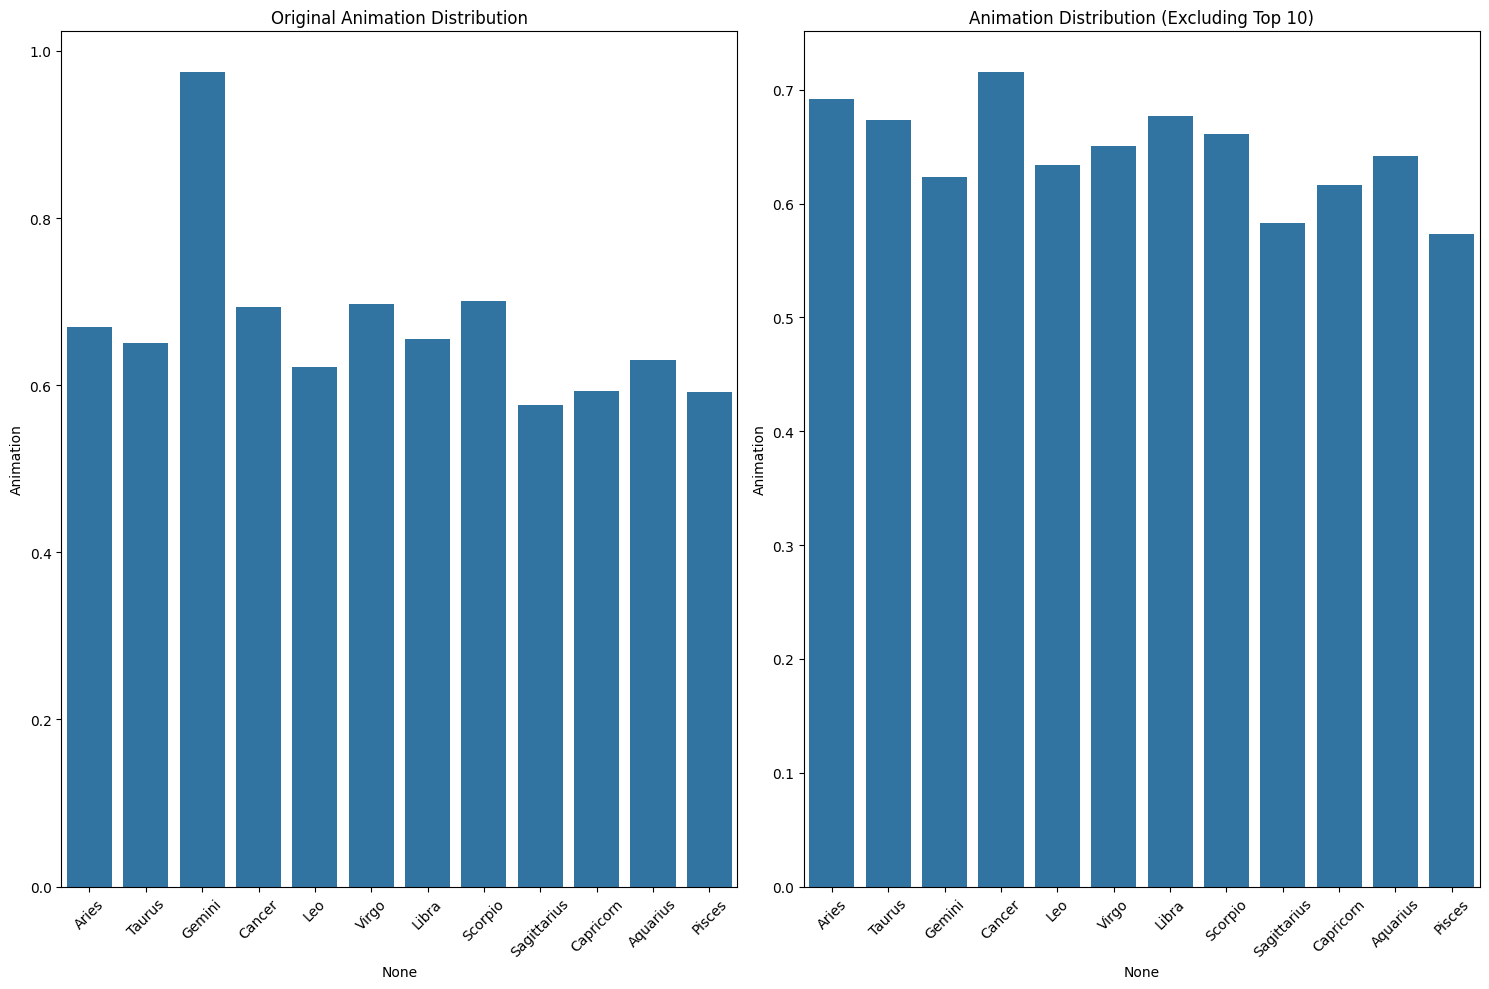

In [34]:
# 1. 首先分析每个星座最高产的演员
def analyze_top_actors_by_zodiac(CharacterMeta, MovieMeta, n_top=20):
    zodiac_top_actors = {}
    
    for zodiac in CharacterMeta['zodiac'].unique():
        # 获取该星座的演员
        zodiac_actors = CharacterMeta[CharacterMeta['zodiac'] == zodiac]
        
        # 计算每个演员的作品数
        actor_counts = zodiac_actors.groupby('Freebase actor ID').size()
        top_actors = actor_counts.nlargest(n_top)
        
        # 获取这些演员的详细信息
        top_actors_details = []
        for actor_id, count in top_actors.items():
            actor_info = zodiac_actors[zodiac_actors['Freebase actor ID'] == actor_id].iloc[0]
            
            # 计算该演员参与的动画作品数
            actor_movies = MovieMeta[MovieMeta['Wikipedia movie ID'].isin(
                zodiac_actors[zodiac_actors['Freebase actor ID'] == actor_id]['Wikipedia movie ID']
            )]
            animation_count = actor_movies['Movie genres'].apply(
                lambda x: 'Animation' in str(x) if pd.notna(x) else False
            ).sum()
            
            top_actors_details.append({
                'Actor ID': actor_id,
                'Actor Name': actor_info['Actor name'],
                'Total Movies': count,
                'Animation Movies': animation_count,
                'Animation Percentage': (animation_count/count)*100 if count > 0 else 0
            })
        
        zodiac_top_actors[zodiac] = pd.DataFrame(top_actors_details)
    
    return zodiac_top_actors

# 2. 计算去除最高产演员后的类型分布
def calculate_genre_distribution(CharacterMeta, MovieMeta, exclude_top_n=10):
    normalized_genre_zodiac_matrix = np.zeros((12, 10))
    zodiac_signs = ['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 
                    'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces']
    valid_genres = ['Drama', 'Comedy', 'Romance Film', 'Action', 'Thriller', 
                    'Documentary', 'Horror', 'Adventure', 'Animation', 'Science Fiction']
    
    # 首先计算基线分布
    total_genre_distribution = {}
    for _, row in MovieMeta.iterrows():
        genres = eval(row['Movie genres'])
        for genre in genres.values():
            if genre in valid_genres:
                total_genre_distribution[genre] = total_genre_distribution.get(genre, 0) + 1
    
    total_movies = sum(total_genre_distribution.values())
    for genre in total_genre_distribution:
        total_genre_distribution[genre] /= total_movies
    
    # 对每个星座计算分布
    for i, zodiac in enumerate(zodiac_signs):
        zodiac_actors = CharacterMeta[CharacterMeta['zodiac'] == zodiac]
        
        # 找出并排除最高产的演员
        if exclude_top_n > 0:
            actor_counts = zodiac_actors.groupby('Freebase actor ID').size()
            top_actors = actor_counts.nlargest(exclude_top_n).index
            zodiac_actors = zodiac_actors[~zodiac_actors['Freebase actor ID'].isin(top_actors)]
        
        # 获取这些演员参演的所有电影
        actor_movies = MovieMeta[MovieMeta['Wikipedia movie ID'].isin(zodiac_actors['Wikipedia movie ID'])]
        
        # 统计每个类型的电影数量
        genre_counts = {genre: 0 for genre in valid_genres}
        for _, row in actor_movies.iterrows():
            genres = eval(row['Movie genres'])
            for genre in genres.values():
                if genre in valid_genres:
                    genre_counts[genre] += 1
        
        # 标准化处理
        total = sum(genre_counts.values())
        if total > 0:
            for j, genre in enumerate(valid_genres):
                if genre in total_genre_distribution and total_genre_distribution[genre] > 0:
                    normalized_genre_zodiac_matrix[i][j] = (genre_counts[genre] / total) / total_genre_distribution[genre]
    
    return pd.DataFrame(normalized_genre_zodiac_matrix, 
                       index=zodiac_signs, 
                       columns=valid_genres)

# 执行分析
print("=== Top Actors Analysis by Zodiac Sign ===")
zodiac_top_actors = analyze_top_actors_by_zodiac(CharacterMeta, MovieMeta)
for zodiac, df in zodiac_top_actors.items():
    print(f"\n{zodiac} Top 5 Most Prolific Actors:")
    print(df.head().to_string())

# 计算原始分布
print("\n=== Original Genre Distribution ===")
original_distribution = calculate_genre_distribution(CharacterMeta, MovieMeta, exclude_top_n=0)
print(original_distribution)

# 计算去除top 10演员后的分布
print("\n=== Genre Distribution (Excluding Top 10 Actors) ===")
filtered_distribution = calculate_genre_distribution(CharacterMeta, MovieMeta, exclude_top_n=10)
print(filtered_distribution)

# 可视化比较
plt.figure(figsize=(15, 10))

# 原始分布的Animation列
plt.subplot(1, 2, 1)
sns.barplot(x=original_distribution.index, y=original_distribution['Animation'])
plt.title('Original Animation Distribution')
plt.xticks(rotation=45)

# 去除top10后的Animation列
plt.subplot(1, 2, 2)
sns.barplot(x=filtered_distribution.index, y=filtered_distribution['Animation'])
plt.title('Animation Distribution (Excluding Top 10)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

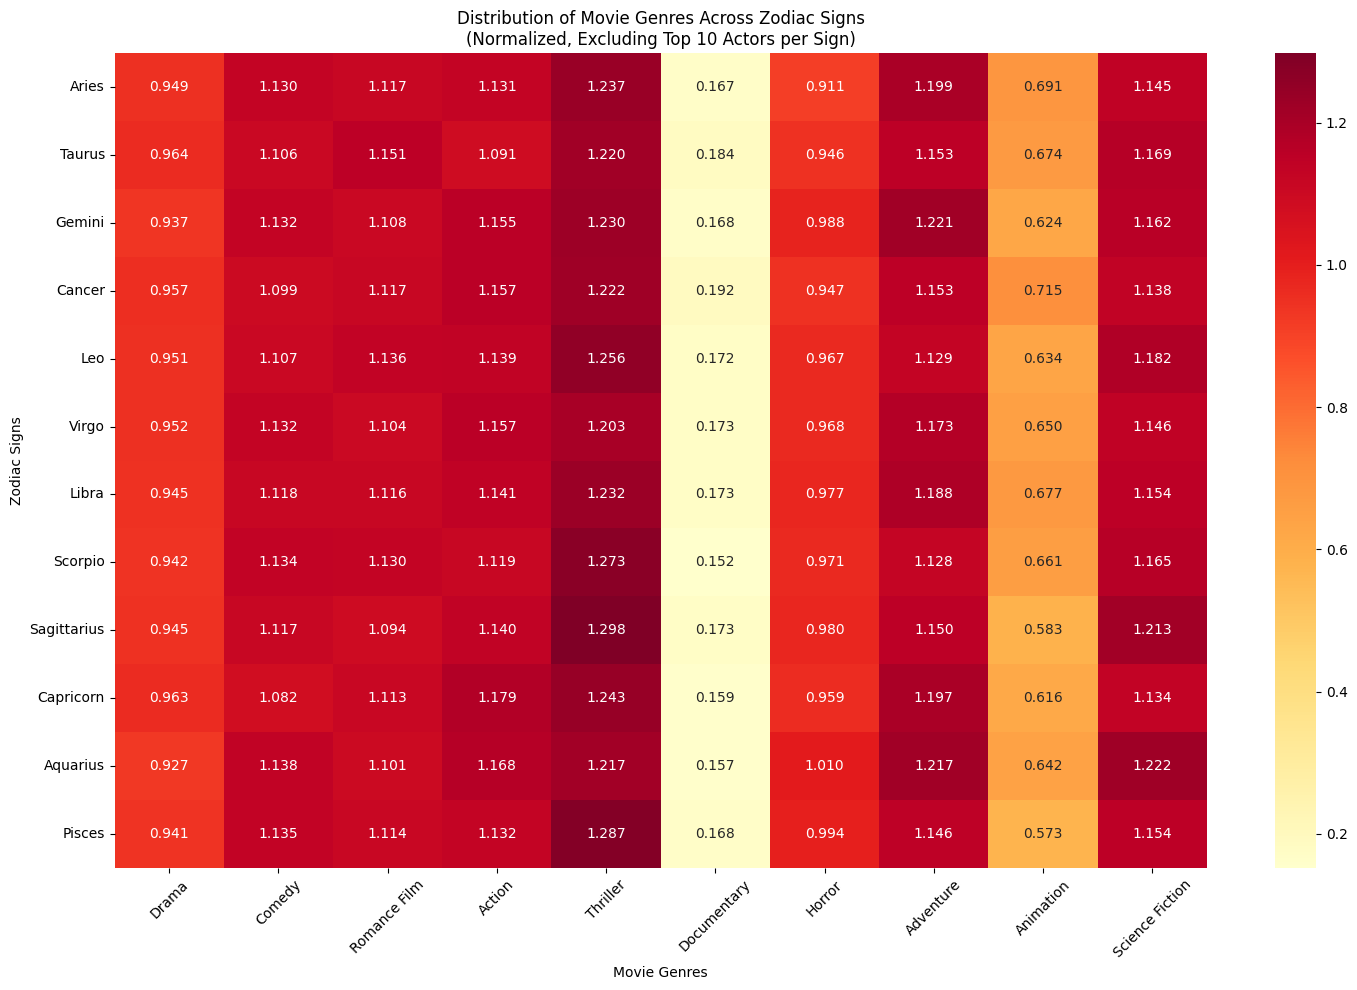


=== Genre Distribution Variance Analysis ===
Standard deviation for each genre (larger number indicates more variance between zodiac signs):
Animation: 0.0424
Adventure: 0.0327
Thriller: 0.0295
Science Fiction: 0.0279
Horror: 0.0258
Action: 0.0234
Comedy: 0.0177
Romance Film: 0.0159
Documentary: 0.0110
Drama: 0.0105


In [35]:
# 使用之前去除top 10演员后的数据创建热力图
plt.figure(figsize=(15, 10))
sns.heatmap(filtered_distribution, 
            cmap='YlOrRd',
            annot=True,
            fmt='.3f',
            xticklabels=True,
            yticklabels=True)

plt.title('Distribution of Movie Genres Across Zodiac Signs\n(Normalized, Excluding Top 10 Actors per Sign)')
plt.xlabel('Movie Genres')
plt.ylabel('Zodiac Signs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 同时让我们计算一下每个类型在各星座间的标准差，看看哪些类型的分布最不均匀
genre_std = filtered_distribution.std()
print("\n=== Genre Distribution Variance Analysis ===")
print("Standard deviation for each genre (larger number indicates more variance between zodiac signs):")
for genre, std in genre_std.sort_values(ascending=False).items():
    print(f"{genre}: {std:.4f}")

=== Significant Genre Preferences by Zodiac Sign ===

Aries:
Strongest preference: Animation (Z-score: 1.10)
Other strong preferences: Animation
Strong aversions: Horror

Taurus:
Strongest preference: Romance Film (Z-score: 2.16)
Other strong preferences: Drama, Romance Film, Documentary
Strong aversions: Action

Gemini:
Strongest preference: Adventure (Z-score: 1.53)
Other strong preferences: Adventure
Strong aversions: Drama

Cancer:
Strongest preference: Documentary (Z-score: 2.00)
Other strong preferences: Documentary, Animation
Strong aversions: Comedy

Leo:
Strongest preference: Romance Film (Z-score: 1.21)
Other strong preferences: Romance Film
Strong aversions: Adventure

Virgo:
Strongest preference: Comedy (Z-score: 0.73)
Strong aversions: Thriller

Libra:
Strongest preference: Animation (Z-score: 0.76)

Scorpio:
Strongest preference: Thriller (Z-score: 1.00)
Other strong preferences: Thriller
Strong aversions: Action, Documentary, Adventure

Sagittarius:
Strongest preference:

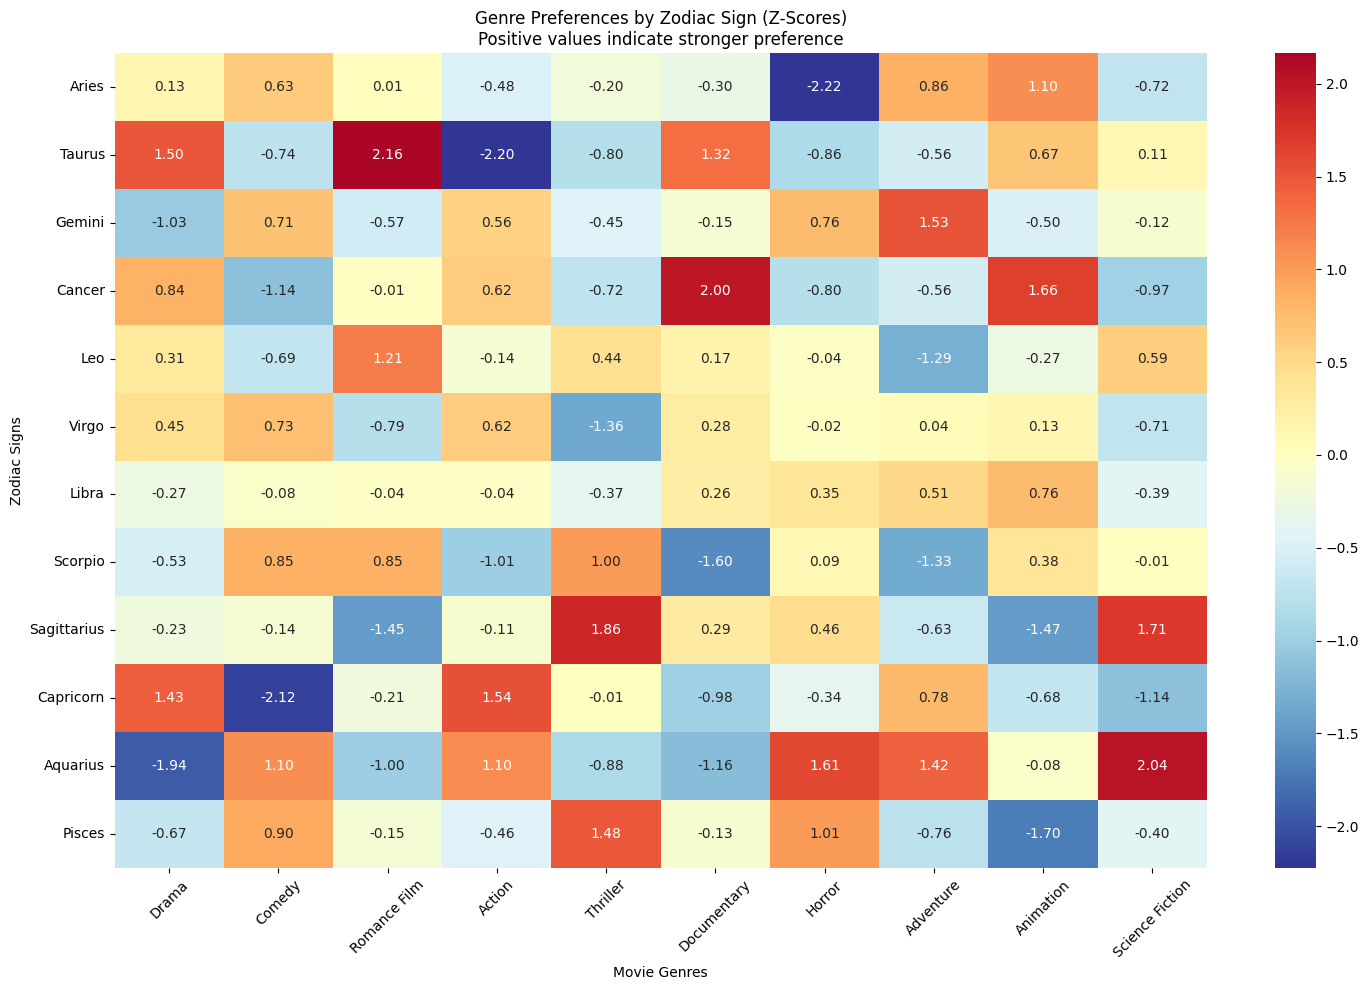

/tmp/ipykernel_220/1477927415.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'\n{max_genres[i]}',


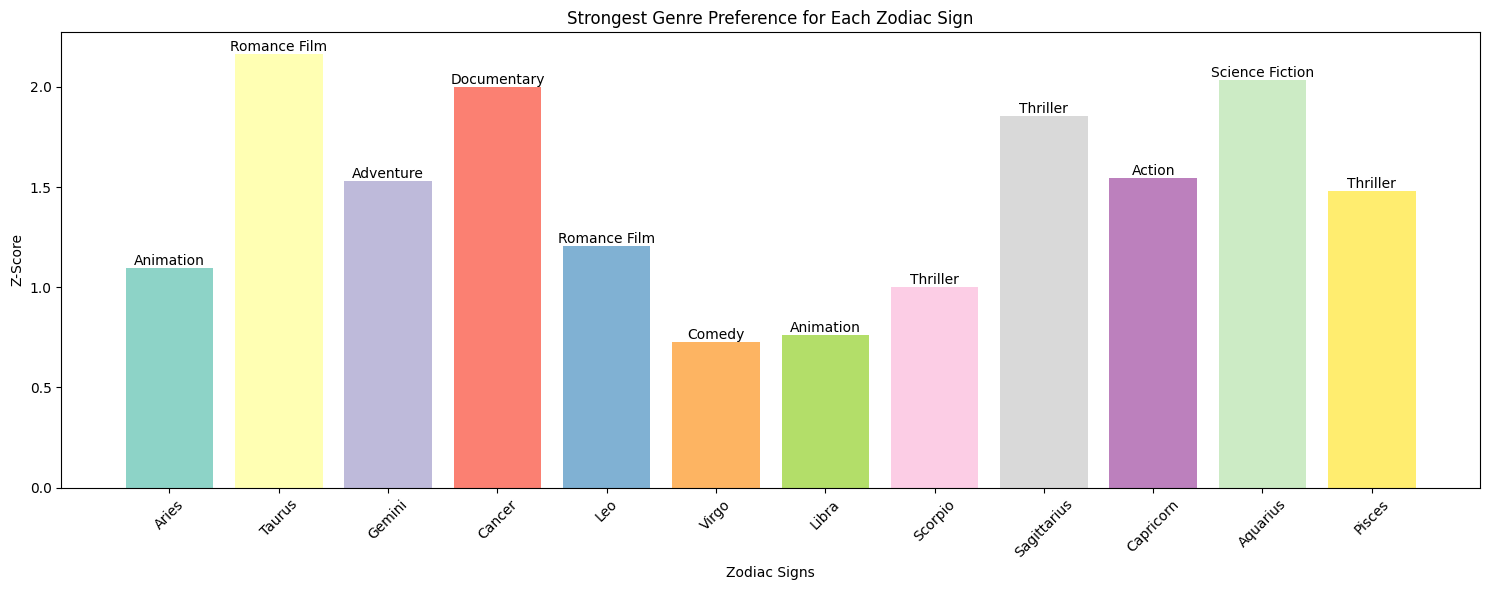

In [36]:
# 1. 计算Z-score来衡量每个星座在各类型上的偏离程度
def calculate_preferences(data):
    # 计算每个类型的均值和标准差
    genre_means = data.mean()
    genre_stds = data.std()
    
    # 计算Z-scores
    z_scores = pd.DataFrame(index=data.index, columns=data.columns)
    for genre in data.columns:
        z_scores[genre] = (data[genre] - genre_means[genre]) / genre_stds[genre]
    
    return z_scores

# 2. 计算每个星座的主导类型（偏好最强的类型）
def get_dominant_genres(z_scores, threshold=1.0):
    preferences = []
    for zodiac in z_scores.index:
        # 获取该星座所有类型的Z-score
        scores = z_scores.loc[zodiac]
        # 找出显著偏好的类型（Z-score > threshold）
        significant = scores[scores.abs() > threshold]
        preferences.append({
            'Zodiac': zodiac,
            'Strong_Preferences': list(significant[significant > 0].index),
            'Strong_Aversions': list(significant[significant < 0].index),
            'Max_Genre': scores.idxmax(),
            'Max_Score': scores.max(),
            'Min_Genre': scores.idxmin(),
            'Min_Score': scores.min()
        })
    return pd.DataFrame(preferences)

# 3. 可视化
def plot_preferences(z_scores):
    plt.figure(figsize=(15, 10))
    
    # 创建热力图
    sns.heatmap(z_scores, 
                cmap='RdYlBu_r',
                center=0,
                annot=True,
                fmt='.2f')
    
    plt.title('Genre Preferences by Zodiac Sign (Z-Scores)\nPositive values indicate stronger preference')
    plt.xlabel('Movie Genres')
    plt.ylabel('Zodiac Signs')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 创建每个星座最显著偏好的条形图
    plt.figure(figsize=(15, 6))
    max_preferences = z_scores.max(axis=1)
    max_genres = z_scores.idxmax(axis=1)
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(max_preferences)))
    bars = plt.bar(max_preferences.index, max_preferences, color=colors)
    
    plt.title('Strongest Genre Preference for Each Zodiac Sign')
    plt.xlabel('Zodiac Signs')
    plt.ylabel('Z-Score')
    plt.xticks(rotation=45)
    
    # 添加类型标签
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'\n{max_genres[i]}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# 使用之前的filtered_distribution数据
z_scores = calculate_preferences(filtered_distribution)
preferences_df = get_dominant_genres(z_scores)

# 打印显著偏好
print("=== Significant Genre Preferences by Zodiac Sign ===")
for _, row in preferences_df.iterrows():
    print(f"\n{row['Zodiac']}:")
    print(f"Strongest preference: {row['Max_Genre']} (Z-score: {row['Max_Score']:.2f})")
    if row['Strong_Preferences']:
        print(f"Other strong preferences: {', '.join(row['Strong_Preferences'])}")
    if row['Strong_Aversions']:
        print(f"Strong aversions: {', '.join(row['Strong_Aversions'])}")

# 绘制可视化
plot_preferences(z_scores)

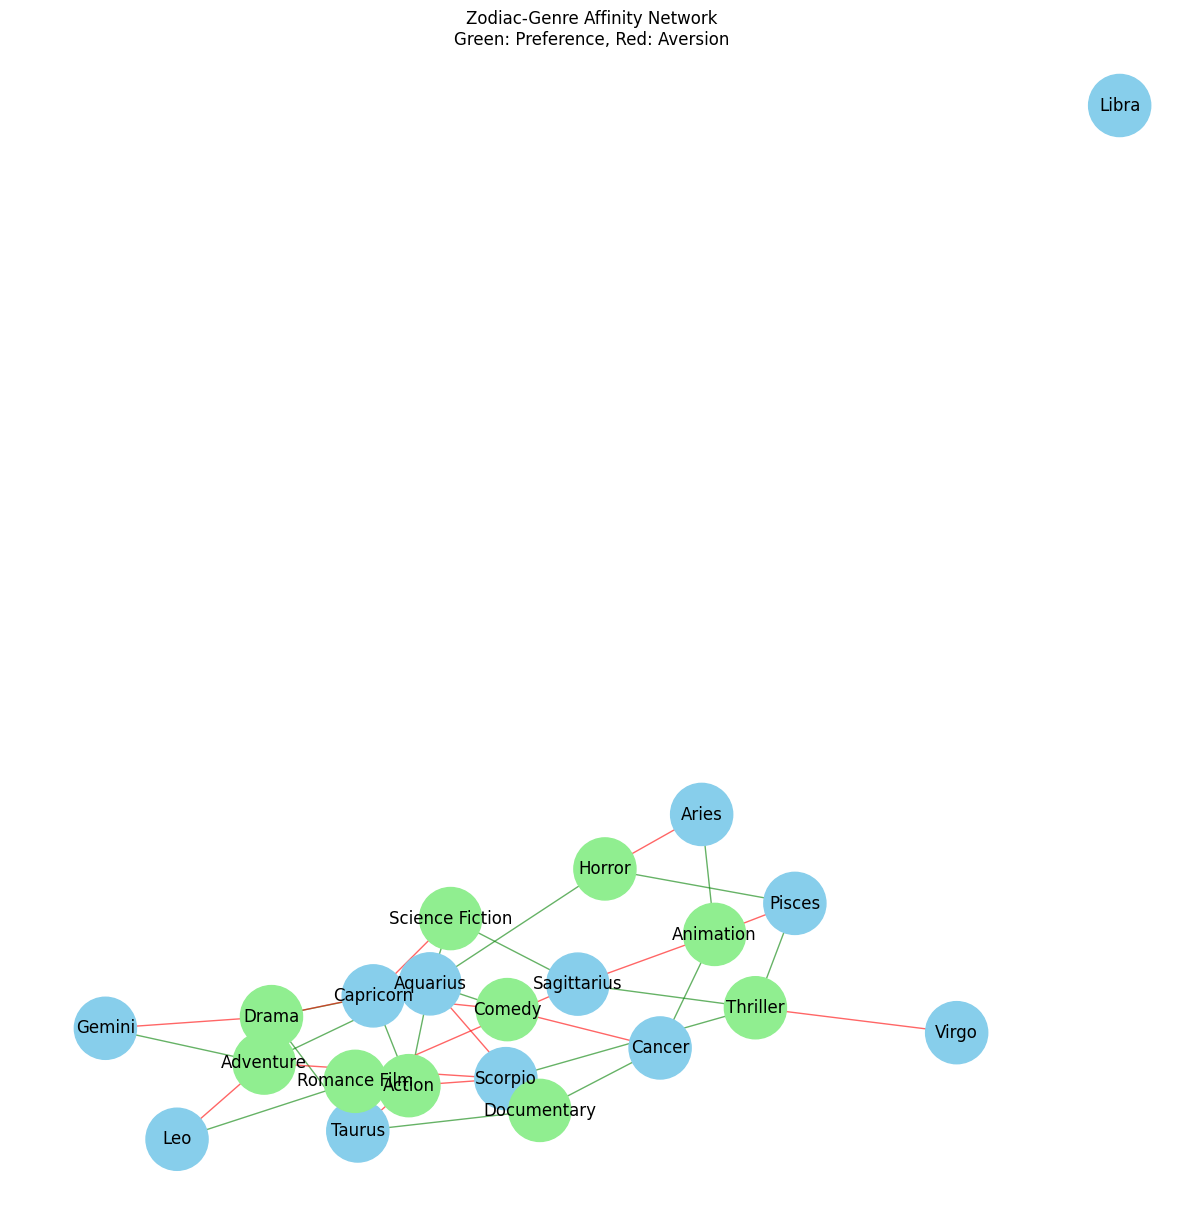

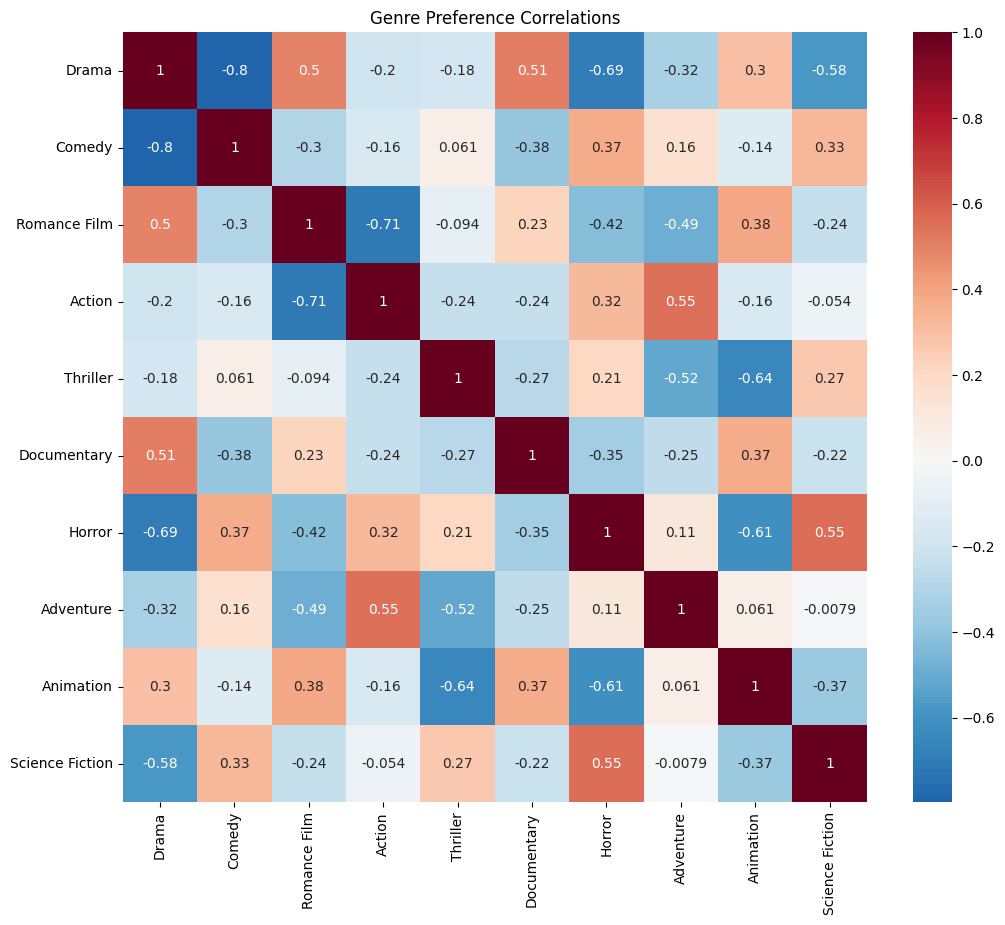


=== Genre Preference Profiles ===
                                              Preferred_Genres  \
Aries                                              [Animation]   
Taurus                      [Drama, Romance Film, Documentary]   
Gemini                                             [Adventure]   
Cancer                                [Documentary, Animation]   
Leo                                             [Romance Film]   
Virgo                                                       []   
Libra                                                       []   
Scorpio                                             [Thriller]   
Sagittarius                        [Thriller, Science Fiction]   
Capricorn                                      [Drama, Action]   
Aquarius     [Comedy, Action, Horror, Adventure, Science Fi...   
Pisces                                      [Thriller, Horror]   

                               Avoided_Genres          Preference_Pattern  
Aries                         

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# 1. 计算每个星座的特征类型组合
def analyze_genre_combinations(z_scores, threshold=1.0):
    zodiac_profiles = {}
    for zodiac in z_scores.index:
        scores = z_scores.loc[zodiac]
        preferences = scores[scores > threshold].index.tolist()
        aversions = scores[scores < -threshold].index.tolist()
        zodiac_profiles[zodiac] = {
            'Preferred_Genres': preferences,
            'Avoided_Genres': aversions,
            'Preference_Pattern': f"{len(preferences)} preferences, {len(aversions)} aversions"
        }
    return pd.DataFrame(zodiac_profiles).T

# 2. 创建星座类型亲和度网络图
def plot_genre_affinity_network(z_scores, threshold=1.0):
    plt.figure(figsize=(15, 15))
    G = nx.Graph()
    
    # 添加节点
    for zodiac in z_scores.index:
        G.add_node(zodiac, node_type='zodiac')
    for genre in z_scores.columns:
        G.add_node(genre, node_type='genre')
    
    # 添加边（只添加显著的偏好）
    for zodiac in z_scores.index:
        for genre in z_scores.columns:
            if abs(z_scores.loc[zodiac, genre]) > threshold:
                G.add_edge(zodiac, genre, 
                          weight=abs(z_scores.loc[zodiac, genre]),
                          preference='positive' if z_scores.loc[zodiac, genre] > 0 else 'negative')
    
    # 绘制网络
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, 
                          node_color=['skyblue' if d['node_type']=='zodiac' else 'lightgreen' 
                                    for (n,d) in G.nodes(data=True)],
                          node_size=2000)
    
    # 绘制边
    edges_pos = [(u, v) for (u, v, d) in G.edges(data=True) if d['preference']=='positive']
    edges_neg = [(u, v) for (u, v, d) in G.edges(data=True) if d['preference']=='negative']
    
    nx.draw_networkx_edges(G, pos, edgelist=edges_pos, edge_color='green', alpha=0.6)
    nx.draw_networkx_edges(G, pos, edgelist=edges_neg, edge_color='red', alpha=0.6)
    nx.draw_networkx_labels(G, pos)
    
    plt.title('Zodiac-Genre Affinity Network\nGreen: Preference, Red: Aversion')
    plt.axis('off')
    plt.show()

# 3. 计算类型相关性矩阵
def analyze_genre_correlations(z_scores):
    correlations = z_scores.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlations, annot=True, cmap='RdBu_r', center=0)
    plt.title('Genre Preference Correlations')
    plt.show()
    return correlations

# 4. 统计摘要
def generate_summary_statistics(z_scores):
    summary = pd.DataFrame({
        'Most_Preferred_By': z_scores.idxmax(),
        'Strongest_Preference': z_scores.max(),
        'Most_Avoided_By': z_scores.idxmin(),
        'Strongest_Aversion': z_scores.min(),
        'Controversy_Score': z_scores.std()  # 衡量在该类型上星座间差异的大小
    })
    return summary.round(3)

# 执行分析
profiles = analyze_genre_combinations(z_scores)
plot_genre_affinity_network(z_scores)
correlations = analyze_genre_correlations(z_scores)
summary = generate_summary_statistics(z_scores)

print("\n=== Genre Preference Profiles ===")
print(profiles)
print("\n=== Summary Statistics ===")
print(summary)